In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph 

In [3]:
class AgentState(TypedDict):
    name: str
    age : int
    final : str



In [4]:
def node_one(state: AgentState) -> AgentState:
    state['final'] = f"Hello {state['name']}!"
    return state
def node_two(state: AgentState) -> AgentState:
    state['final'] += f" You are {state['age']} years old."
    return state


In [9]:
graph = StateGraph(AgentState)
graph.add_node("node_one", node_one)
graph.add_node("node_two", node_two)

graph.set_entry_point("node_one")
graph.add_edge("node_one", "node_two")
graph.set_finish_point("node_two")

app = graph.compile()

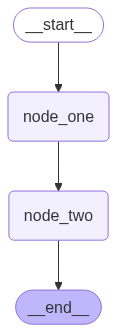

In [11]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
result = app.invoke(AgentState(name="Earther", age=30, final=""))
print(result['final'])  

Hello Earther! You are 30 years old.
